<a href="https://colab.research.google.com/github/elenamnivonh/Actividad_3ValoresAtipicos/blob/main/Actividad3_Valores_At%C3%ADpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##LIMPIEZA Y TRATAMIENTO DE OUTLIERS 2020

In [268]:
#Hoja del año 2020
data20=pd.read_excel('Gastos y costos 20-23.xlsx',skiprows=5,sheet_name='2020')
data20

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,NaN,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,NaN,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,NaN,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,NaN,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,1.0,0.00,NaN,0.0,0.0,0.00,0.00,P,Vigente,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,1.0,129.79,20.21,0.0,0.0,150.00,150.00,I,Vigente,NaN,0.00
3338,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,I,Vigente,NaN,0.00
3339,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,1.0,163.79,26.21,0.0,0.0,190.00,190.00,I,Vigente,NaN,0.00
3340,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN,0.00


In [269]:
#Información de la base
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [270]:
#Identificación de nulos
nulos20=data20.isnull().sum()
nulos20

FECHA             0
FOLIO           189
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TC              391
IMPORTE          34
IVA             268
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              1
STATUS            0
POLIZA         3321
Columna1          0
dtype: int64

In [271]:
#Realizamos una copia del dataframe
data2020=data20.copy()

In [272]:
#Sustitución de nulos
data20["TIPO"]=data2020["TIPO"].fillna(method="ffill") #Sustituye con el valor anterior
data20["FOLIO"]=data2020["FOLIO"].fillna("0000") #Se coloca 0 porq no cuenta con poliza
data20["POLIZA"]=data2020["POLIZA"].fillna(00000)
data20["GASTO"]=data2020["GASTO"].fillna("Desconocido")
data20["TC"]=data2020["TC"].fillna("1")
data20["IMPORTE"]=data2020["IMPORTE"].fillna(0)
data20["IVA"]=data2020["IVA"].fillna(0)

In [273]:
#Verificación de nulos
#Identificación de nulos
nulos20=data20.isnull().sum()
nulos20

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
Columna1       0
dtype: int64

In [274]:
#Separación de cuantitativos y cualitivos

# Separar los datos cuantitativos (numéricos)
datos_cuantitativos20 = data20.select_dtypes(include=['int64', 'float64'])

# Separar los datos cualitativos (categóricos)
datos_cualitativos20 = data20.select_dtypes(include=['object','datetime64'])

<Figure size 1500x800 with 0 Axes>

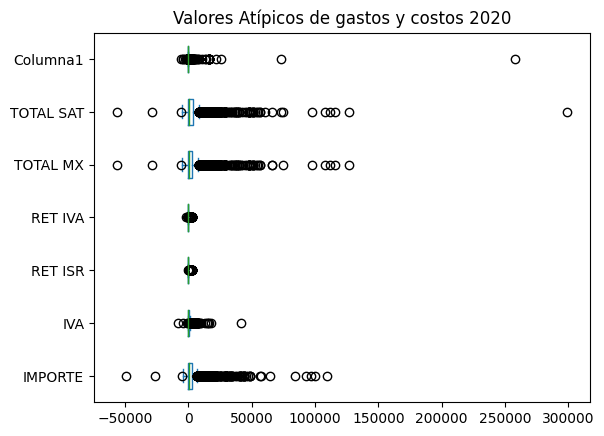

In [275]:
###Identificación de outliers###
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
datos_cuantitativos20.plot(kind='box', vert=False)
plt.title("Valores Atípicos de gastos y costos 2020")
plt.show() #dibujamos el diagrama

PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR"

In [276]:
#Sustitución de outliers

#Limites superior e inferior del data frame
y=datos_cuantitativos20
Limite_superior= y.mean()+3*y.std()
Limite_inferior= y.mean()-3*y.std()
print("Limite superior permitido",Limite_superior)
print("Limite inferior permitido",Limite_inferior)

Limite superior permitido IMPORTE      25156.362379
IVA           4543.610743
RET ISR        667.271992
RET IVA        958.239955
TOTAL MX     28488.002843
TOTAL SAT    33250.398514
Columna1     14626.999268
dtype: float64
Limite inferior permitido IMPORTE     -18921.747418
IVA          -3587.332203
RET ISR       -627.750813
RET IVA       -839.215179
TOTAL MX    -21455.655297
TOTAL SAT   -25762.462834
Columna1    -14171.411134
dtype: float64


In [277]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
cuantitativos2020=datos_cuantitativos20[(y<=Limite_superior)&(y>=Limite_inferior)]
cuantitativos2020.head(10)

,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,0.00,0.00,0.0,0.0,0.00,0.00,0.00
5,0.00,0.00,0.0,0.0,0.00,0.00,0.00
6,NaN,NaN,0.0,0.0,NaN,NaN,0.00
7,8620.69,1379.31,0.0,0.0,10000.00,10000.00,0.00
8,0.01,0.00,0.0,0.0,0.01,0.00,-0.01
9,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [278]:
#Corroboramos valores nulos
valores_nulos=cuantitativos2020.isnull().sum()
valores_nulos

IMPORTE      67
IVA          59
RET ISR      21
RET IVA      74
TOTAL MX     65
TOTAL SAT    45
Columna1     15
dtype: int64

In [279]:
#Reemplaza valores atipicos (nulos) del dataframe con "mean"
data_clean2020=cuantitativos2020.copy()
data_clean2020=data_clean2020.fillna(round(cuantitativos2020.mean(),1))
data_clean2020

,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,0.00,0.00,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...
3337,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [280]:
#Verificación de valores nulos
valores_nulos=data_clean2020.isnull().sum()
valores_nulos

IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
Columna1     0
dtype: int64

In [281]:
#Se unen la base sin outliers y  los datos cualitativos
data_clean2020 = data_clean2020.reset_index(drop=True)
datos_cualitativos = datos_cualitativos20.reset_index(drop=True)
df_final_2020 = pd.concat([datos_cualitativos,data_clean2020], axis=1)
df_final_2020.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,TIPO,STATUS,POLIZA,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,Desconocido,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,I,Vigente,0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Desconocido,COMISION COBRADA,1.0,I,Vigente,0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Desconocido,COMISION COBRADA,1.0,I,Vigente,0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,Desconocido,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,I,Vigente,0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,Desconocido,Pago,1.0,P,Vigente,0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [282]:
df_final_2020.to_csv('Gastos y Costos 2020.csv')

In [283]:
#Descargar archivo filtrado en csv
from google.colab import files
files.download("Gastos y Costos 2020.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##LIMPIEZA Y TRATAMIENTO DE OUTLIERS 2021

In [284]:
#Hoja del año 2021
data21=pd.read_excel('Gastos y costos 20-23.xlsx',skiprows=3,sheet_name='2021')
data21

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,0
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,345.00,55.20,0.0,0.0,400.20,400.20,I,Vigente,0
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00,I,Vigente,0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,I,Vigente,0
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,I,Vigente,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04,I,Vigente,NaN
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN


In [285]:
#Información de la base
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

In [286]:
#Identificación de nulos
nulos21=data21.isnull().sum()
nulos21

FECHA             0
FOLIO           147
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2372
dtype: int64

In [287]:
#Realizamos una copia del dataframe
data2021=data21.copy()

In [288]:
#Sustitución de nulos
data21["FOLIO"]=data2021["FOLIO"].fillna("Desconocido")
data21["MP"]=data2021["MP"].fillna("PUE")
data21["POLIZA"]=data2021["POLIZA"].fillna(00000)

In [289]:
#Verificación de nulos
#Identificación de nulos
nulos21=data21.isnull().sum()
nulos21

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64

In [290]:
#Separación de cuantitativos y cualitivos

# Separar los datos cuantitativos (numéricos)
datos_cuantitativos21 = data21.select_dtypes(include=['int64', 'float64'])

# Separar los datos cualitativos (categóricos)
data21['TC'] = data21['TC'].astype('object')
datos_cualitativos21 = data21.select_dtypes(include=['object','datetime64'])

<Figure size 1500x800 with 0 Axes>

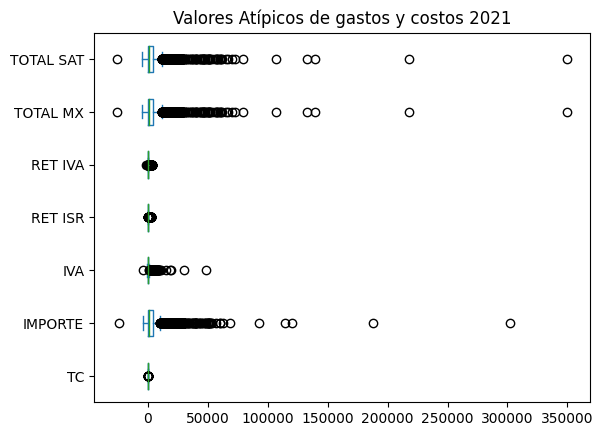

In [291]:
###Identificación de outliers###
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
datos_cuantitativos21.plot(kind='box', vert=False)
plt.title("Valores Atípicos de gastos y costos 2021")
plt.show() #dibujamos el diagrama

PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR"

In [292]:
#Sustitución de outliers

#Limites superior e inferior del data frame
y21=datos_cuantitativos21
Limite_superior21= y21.mean()+3*y.std()
Limite_inferior21= y21.mean()-3*y.std()
print("Limite superior permitido",Limite_superior21)
print("Limite inferior permitido",Limite_inferior21)

Limite superior permitido Columna1              NaN
IMPORTE      26303.433423
IVA           4659.504190
RET ISR        680.871976
RET IVA        972.245550
TC                    NaN
TOTAL MX     29723.713208
TOTAL SAT    34277.671501
dtype: float64
Limite inferior permitido Columna1              NaN
IMPORTE     -17774.676374
IVA          -3471.438756
RET ISR       -614.150829
RET IVA       -825.209583
TC                    NaN
TOTAL MX    -20219.944932
TOTAL SAT   -24735.189847
dtype: float64


In [293]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
cuantitativos2021=datos_cuantitativos21[(y<=Limite_superior21)&(y>=Limite_inferior21)]
cuantitativos2021.head(10)

<ipython-input-293-a42bbedd7bbc>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cuantitativos2021=datos_cuantitativos21[(y<=Limite_superior21)&(y>=Limite_inferior21)]


,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,490.00,78.40,0.0,0.0,568.4,568.40
1,NaN,345.00,55.20,0.0,0.0,400.2,400.20
2,NaN,3447.41,551.59,0.0,0.0,3999.0,3999.00
3,NaN,5551.38,888.22,0.0,0.0,6439.6,6439.60
4,NaN,5551.98,888.32,0.0,0.0,6440.3,6440.30
5,NaN,0.00,0.00,0.0,0.0,0.0,0.00
6,NaN,NaN,NaN,0.0,0.0,NaN,NaN
7,NaN,0.00,0.00,0.0,0.0,0.0,599.00
8,NaN,0.00,0.00,0.0,0.0,0.0,335.37
9,NaN,0.00,0.00,0.0,0.0,0.0,495.64


In [294]:
#Corroboramos valores nulos
valores_nulos21=cuantitativos2021.isnull().sum()
valores_nulos21

TC           3035
IMPORTE        54
IVA            49
RET ISR        18
RET IVA        59
TOTAL MX       44
TOTAL SAT      38
dtype: int64

In [295]:
#Reemplaza valores atipicos (nulos) del dataframe con "mean"
data_clean2021=cuantitativos2021.copy()
data_clean2021=data_clean2021.fillna(round(cuantitativos2021.mean(),1))
data_clean2021

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,490.00,78.40,0.0,0.0,568.40,568.40
1,NaN,345.00,55.20,0.0,0.0,400.20,400.20
2,NaN,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,NaN,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,NaN,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,NaN,0.00,0.00,0.0,0.0,0.00,0.00
3031,NaN,0.00,0.00,0.0,0.0,0.00,0.00
3032,NaN,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,NaN,0.00,0.00,0.0,0.0,0.00,0.00


In [296]:
#Verificación de valores nulos
valores_nulos21=data_clean2021.isnull().sum()
valores_nulos21

TC           3035
IMPORTE         0
IVA             0
RET ISR         0
RET IVA         0
TOTAL MX        0
TOTAL SAT       0
dtype: int64

In [297]:
#Se unen la base sin outliers y  los datos cualitativos
data_clean2021 = data_clean2021.reset_index(drop=True)
datos_cualitativos21 = datos_cualitativos21.reset_index(drop=True)
df_final_2021 = pd.concat([datos_cualitativos21,data_clean2021], axis=1)
df_final_2021.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,I,Vigente,0,NaN,490.00,78.40,0.0,0.0,568.4,568.4
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,I,Vigente,0,NaN,345.00,55.20,0.0,0.0,400.2,400.2
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,I,Vigente,0,NaN,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,1.0,I,Vigente,0,NaN,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,1.0,I,Vigente,0,NaN,5551.98,888.32,0.0,0.0,6440.3,6440.3


In [298]:
df_final_2020.to_csv('Gastos y Costos 2021.csv')

In [299]:
#Descargar archivo filtrado en csv
from google.colab import files
files.download("Gastos y Costos 2021.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##LIMPIEZA Y TRATAMIENTO DE OUTLIERS 2022

In [300]:
#Hoja del año 2022
data222=pd.read_excel('Gastos y costos 20-23.xlsx',skiprows=3,sheet_name='2022')
data22 = data222.drop(columns=['Otros'])
data22

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62,I,Vigente,NaN
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,NaN,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN


In [301]:
#Información de la base
data22.info()
data22['TC'] = data22['TC'].astype('object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  TOTAL MX     2577 non-null   float64       
 14  TOTAL SAT    2577 non-null   float64       
 15  Tipo         2577 non-null   object        
 16  Status

In [302]:
#Identificación de nulos
nulos22=data22.isnull().sum()
nulos22

Fecha            0
Folio          102
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       0
Descripción      0
MP             553
TC             636
Importe          0
IVA              0
RET ISR          0
RET IVA          0
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         801
dtype: int64

In [303]:
#Realizamos una copia del dataframe
data2022=data22.copy()

In [304]:
#Sustitución de nulos
data22["Folio"]=data2022["Folio"].fillna("Desconocido")
data22["MP"]=data2022["MP"].fillna("PUE")
data22["Descripción"]=data2022["Descripción"].fillna("Desconocido")
data22["TIPO GASTO"]=data2022["TIPO GASTO"].fillna("Otros")
data22["TC"]=data2022["TC"].fillna("00")
data22["Poliza"]=data2022["Poliza"].fillna(00000)

In [305]:
#Verificación de nulos
#Identificación de nulos
nulos22=data22.isnull().sum()
nulos22

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

In [306]:
#Separación de cuantitativos y cualitivos

# Separar los datos cuantitativos (numéricos)
datos_cuantitativos22 = data2022.select_dtypes(include=['int64', 'float64'])

# Separar los datos cualitativos (categóricos)
datos_cualitativos22 = data22.select_dtypes(include=['object','datetime64'])

<Figure size 1500x800 with 0 Axes>

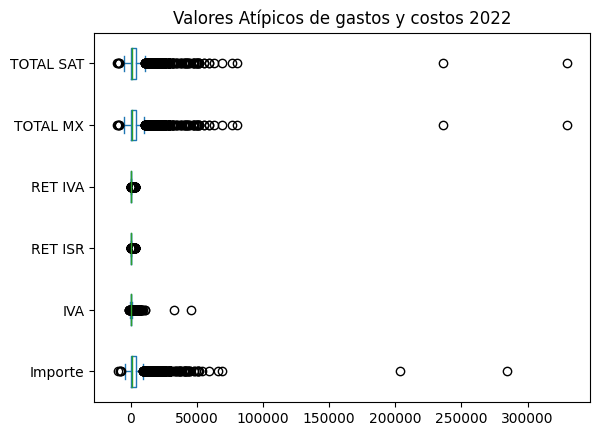

In [307]:
###Identificación de outliers###
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
datos_cuantitativos22.plot(kind='box', vert=False)
plt.title("Valores Atípicos de gastos y costos 2022")
plt.show() #dibujamos el diagrama

PROCEDIMIENTO IQR

In [308]:
#Metodo de IQR
y22=datos_cuantitativos22
percentile25=y22.quantile(0.25)#Q1
percentile75=y22.quantile(0.75)#Q3

iqr=percentile75-percentile25

limite_superior22=percentile75+1.5*iqr
limite_inferior22=percentile25-1.5*iqr

print("Limite superior: ",limite_superior22)
print("Limite inferior: ",limite_inferior22)

Limite superior:  Importe       9058.900
IVA           1031.150
RET ISR          0.000
RET IVA          0.000
TOTAL MX     10374.700
TOTAL SAT    10485.475
dtype: float64
Limite inferior:  Importe     -5435.340
IVA          -618.690
RET ISR         0.000
RET IVA         0.000
TOTAL MX    -6224.820
TOTAL SAT   -6291.285
dtype: float64


In [309]:
#Obtenemos un df sin outliersc
cuantitativos22=datos_cuantitativos22[(y22<=limite_superior22)&(y22>=limite_inferior22)]

In [310]:
#Imprimir los nuevos
cuantitativos22.isnull().sum()

Importe      305
IVA          303
RET ISR       71
RET IVA       70
TOTAL MX     291
TOTAL SAT    288
dtype: int64

In [311]:
#Reemplaza valores atipicos (nulos) del dataframe con "mean"
data_clean22=cuantitativos22.copy()
data_clean2022=data_clean22.fillna(round(cuantitativos22.mean(),1))
data_clean2022

,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,0.00,0.00,0.0,0.0,0.0,0.0
3,0.00,0.00,0.0,0.0,0.0,0.0
4,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2572,0.00,0.00,0.0,0.0,0.0,0.0
2573,1449.20,516.32,0.0,0.0,1711.5,1782.0
2574,0.00,0.00,0.0,0.0,0.0,0.0
2575,0.00,0.00,0.0,0.0,0.0,0.0


In [312]:
#Verificación de valores nulos
valores_nulos22=data_clean2022.isnull().sum()
valores_nulos22

Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [313]:
#Se unen la base sin outliers y  los datos cualitativos
data_clean2022 = data_clean2022.reset_index(drop=True)
datos_cualitativos22 = datos_cualitativos22.reset_index(drop=True)
df_final_2022 = pd.concat([datos_cualitativos22,data_clean2022], axis=1)
df_final_2022.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Tipo,Status,Poliza,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,I,Vigente,PE02-ENE22,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,I,Vigente,PE03-ENE22,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,I,Vigente,0,0.00,0.00,0.0,0.0,0.0,0.0
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,1.0,P,Vigente,0,0.00,0.00,0.0,0.0,0.0,0.0
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,1.0,P,Vigente,0,0.00,0.00,0.0,0.0,0.0,0.0


In [314]:
#Descargar archivo filtrado en csv
df_final_2022.to_csv('Gastos y Costos 2022.csv')

In [315]:
from google.colab import files
files.download("Gastos y Costos 2022.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##LIMPIEZA Y TRATAMIENTO DE OUTLIERS 2023

In [316]:
#Hoja del año 2023
data223=pd.read_excel('Gastos y costos 20-23.xlsx',skiprows=3,sheet_name='2023')
data23 = data223.drop(columns=['Otros'])
data23

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00,I,Vigente,NaN
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92,I,Vigente,NaN
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32,I,Vigente,NaN


In [317]:
data23['TC'] = data23['TC'].astype('object')
data23['FP'] = data23['FP'].astype('object')

In [318]:
#Información de la base
data23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    object        
 9   TC           397 non-null    object        
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  TOTAL MX     397 non-null    float64       
 15  TOTAL SAT    397 non-null    float64       
 16  Tipo    

In [319]:
#Identificación de nulos
nulos23=data23.isnull().sum()
nulos23

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64

In [320]:
#Realizamos una copia del dataframe
data2023=data23.copy()

In [321]:
#Sustitución de nulos
data23["Folio"]=data2023["Folio"].fillna("Desconocido")
data23["MP"]=data2023["MP"].fillna("PUE")
data23["TC"]=data2023["TC"].fillna('000')
data23["FP"]=data2023["FP"].fillna('000')
data23["Poliza"]=data2023["Poliza"].fillna(00000)

In [322]:
#Verificación de nulos
#Identificación de nulos
nulos23=data23.isnull().sum()
nulos23

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     8
Descripción    0
MP             0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

In [323]:
#Separación de cuantitativos y cualitivos

# Separar los datos cuantitativos (numéricos)
datos_cuantitativos23 = data2023.select_dtypes(include=['int64', 'float64'])

# Separar los datos cualitativos (categóricos)
datos_cualitativos23 = data23.select_dtypes(include=['object','datetime64'])

<Figure size 1500x800 with 0 Axes>

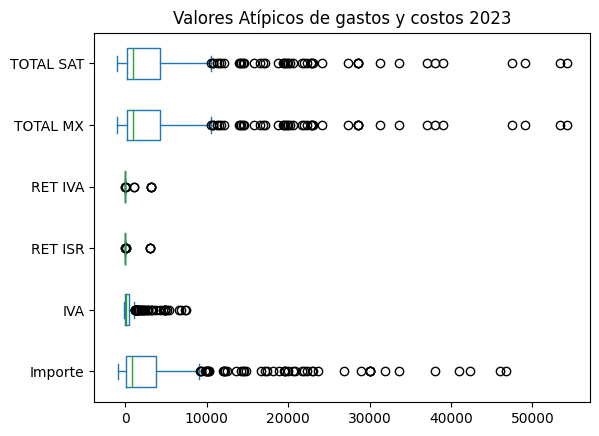

In [324]:
###Identificación de outliers###
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
datos_cuantitativos23.plot(kind='box', vert=False)
plt.title("Valores Atípicos de gastos y costos 2023")
plt.show() #dibujamos el diagrama

PROCEDIMIENTO IQR


In [325]:
#Metodo de IQR
y23=datos_cuantitativos23
percentile25=y23.quantile(0.25)#Q1
percentile75=y23.quantile(0.75)#Q3

iqr=percentile75-percentile25

limite_superior23=percentile75+1.5*iqr
limite_inferior23=percentile25-1.5*iqr

print("Limite superior: ",limite_superior23)
print("Limite inferior: ",limite_inferior23)

Limite superior:  Importe       9075.43
IVA           1120.00
RET ISR          0.00
RET IVA          0.00
TOTAL MX     10527.50
TOTAL SAT    10527.50
dtype: float64
Limite inferior:  Importe     -5259.05
IVA          -672.00
RET ISR         0.00
RET IVA         0.00
TOTAL MX    -6100.50
TOTAL SAT   -6100.50
dtype: float64


In [326]:
#Obtenemos un df sin outliers
cuantitativos23=datos_cuantitativos23[(y23<=limite_superior23)&(y22>=limite_inferior23)]

In [327]:
#Imprimir los nuevos
cuantitativos23.isnull().sum()

Importe      51
IVA          51
RET ISR       9
RET IVA       9
TOTAL MX     47
TOTAL SAT    47
dtype: int64

In [328]:
#Reemplaza valores atipicos (nulos) del dataframe con "mean"
data_clean2023=cuantitativos23.copy()
data_clean2023=data_clean2023.fillna(round(cuantitativos22.mean(),1))
data_clean2023

,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,0.00,0.00,0.0,0.0,0.00,0.00
1,0.00,0.00,0.0,0.0,0.00,0.00
2,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,8454.37,171.80,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...
392,0.00,0.00,0.0,0.0,0.00,0.00
393,220.00,0.00,0.0,0.0,220.00,220.00
394,1449.20,682.40,0.0,0.0,1711.50,1782.00
395,1449.20,0.00,0.0,0.0,1711.50,1782.00


In [329]:
#Verificación de valores nulos
valores_nulos23=data_clean2023.isnull().sum()
valores_nulos23

Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [330]:
#Se unen la base sin outliers y  los datos cualitativos
data_clean2023 = data_clean2023.reset_index(drop=True)
datos_cualitativos23 = datos_cualitativos23.reset_index(drop=True)
df_final_2023 = pd.concat([datos_cualitativos23,data_clean2023], axis=1)
df_final_2023.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,Tipo,Status,Poliza,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PUE,000,P,Vigente,0,0.00,0.00,0.0,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PUE,000,P,Vigente,0,0.00,0.00,0.0,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,I,Vigente,PE01-ENE23,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,I,Vigente,PE02-ENE23,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,I,Vigente,PE03-ENE23,8454.37,171.80,0.0,0.0,9807.07,9807.07


In [331]:
#Descargar archivo filtrado en csv
df_final_2023.to_csv('Gastos y Costos 2023.csv')

In [332]:
from google.colab import files
files.download("Gastos y Costos 2023.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>